# Comparison of algorithms

In [1]:
import matplotlib.pyplot as plt
import os
import time
results = [[4.489, 11643972.748, 16634859.374666655, 38871180.79125, 46760305.5294, 65153203.85933339, 88816313.34357135, 88546431.356375, 105777149.41388892, 116335193.58190003, 123648418.73336361, 141882488.564, 137284909.29823077, 141869927.9479286, 154608487.1600665, 151706930.2671875, 154737885.08270606, 163960337.3490555, 173083042.99278948, 168292807.73464996, 181256559.76104754, 172361538.6285001, 178797976.16226095, 184797135.71854183, 192659795.83607993, 187728198.7181155, 186639938.29537043, 185265194.34789285, 191799093.8255864, 192484444.10283354, 193667868.1332581, 195121957.756625, 192536403.21839398, 193107222.05285305, 198096608.5420002, 202767901.9968334, 199535830.29543212, 199164171.4413157, 194607896.84007698, 204099438.57697517, 202465791.84934124, 204662319.67307144, 206450838.7171395, 205005229.3519316, 198544408.61722222, 201245905.81015214, 212307809.6309149, 205652819.3118543, 208347164.24465317, 204887271.3812202],
 [4.627, 5.0075, 6.9103333333333445, 483830.211, 7837110.245200003, 19717484.506166667, 47481452.2881429, 52693170.416, 75919884.25222225, 91240798.13260002, 100077879.18336356, 113220565.13666672, 121085303.01323086, 130084782.26771423, 135296323.5092667, 135535020.778125, 142997547.65258822, 148564949.20861092, 159777385.7589471, 166251272.7622, 160713672.57514274, 170106141.1741817, 177934434.15156513, 176725019.7444583, 176090888.08947983, 173173564.9959613, 181602311.4765187, 180285029.0485713, 187278081.3845514, 184427675.44019988, 183351888.9867095, 187128767.367875, 182047561.20418173, 197288425.270235, 190354635.36657134, 192429236.13538918, 197358409.30945963, 192204979.85352638, 199923348.75700048, 191042560.90550014, 201540985.74395132, 194923885.82214284, 196742379.8452327, 200242883.5597497, 197165146.64780012, 206087563.01132625, 196754645.41017053, 205296734.79704124, 208174165.63228565, 201803293.40518]]
number_of_samples = 1000

In [2]:
'''
Returns the dumped data in the following format:

Return values:
parsed_topology_names: the topology names that were contained in the file (such as graph1)
parsed_measures: 
processed_results: results parsed from the log file and processed, so that they are contained as a list of tuples,
                   with as many elements as topologies,
                   each tuple containing the specific measures (e.g. AVG waiting time, distances, etc.)
'''
def parse_from_log(log_file_path: str, filename: str):
    
    # Basic regex variables
    timestamp_regex = '[0-9:\- ]'
    alphanumeric_regex = '[0-9a-zA-Z]*'
    floating_list_regex = '[0-9., ]'
    debugging_regex = ' - root - DEBUG - '
    delimeter_regex = '-------'
    
    # Regex for the file
    measures_regex = '\[\'[a-zA-Z.,: \']*\'\]'
    #'(?P<topology_name>)' +
    topology_names_regex = '\- ' +  '(?P<topology_name>' + alphanumeric_regex + ')\:' + '\n'
    results_regex = '\[' + floating_list_regex + '*\]'

    # Stores for the found strings
    parsed_measures = []
    parsed_topology_names = []
    parsed_results = []
    
    with open(log_file_path + "/" + filename, "r") as log_file:
        for line in log_file:
            
            for match in re.finditer(measures_regex, line, re.S):
                matched = match.group()
                parsed_measures.append(matched)
            
            for match in re.finditer(results_regex, line, re.S):
                matched = match.group()
                parsed_results.append(matched)
                
            for match in re.finditer(topology_names_regex, line, re.S):
                matched = match.group('topology_name')
                parsed_topology_names.append(matched)
    
    # Evaluate the string of list as a list
    parsed_results = [ast.literal_eval(x) for x in parsed_results]
    parsed_measures = [ast.literal_eval(x) for x in parsed_measures][0]
    
    count_tuples = 0
    temp_tuple = ()
        
    processed_results = []
    
    # Create len(parsed_topology_names) many len(parsed_measures)-tuples
    for result_index in range(len(parsed_results)):
        temp_tuple += (parsed_results[result_index],)
        
        # See when we have processed the specific measures for a given topology already
        if len(temp_tuple) % len(parsed_measures) == 0:
            processed_results.append(temp_tuple)
            temp_tuple = ()
            
    return parsed_topology_names, parsed_measures, processed_results

In [10]:
colors = ['red', 'green', 'blue', 'purple']

def plot_specific_measure(results: list, algo_name: str, title: str,
                          topology_names: list, measures: list,  measure_index: int):
    timestr = time.strftime("%y_%m_%d__%H_%M")
    for index in range(len(results)):
        plt.plot(results[index][measure_index],color=colors[index], label=topology_names[index])
    plt.grid(color='b', linestyle='-', linewidth=0.1)
    plt.xlabel('Number of SD pairs')
    plt.ylabel(measures[measure_index])
    plt.title('Algorithm: ' + title)
    plt.legend()

    # Create the logs directory, if it is non-existant yet
    directory = 'plots'
    if not os.path.exists(directory):
        os.makedirs(directory)

    plt.savefig('./' + directory + '/' + algo_name + '_' + str(number_of_samples) + '_' + measures[measure_index] +
                '_' + timestr +'.png', bbox_inches='tight')

    plt.show()

def plot_results(results:list, algo_name: str, title: str, topology_names=['graph0 (dth=1)', 'graph1 (dth=1)',
                                                           'graph2 (dth=2)', 'graph3 (dth=4)'],
                                           measure_names=['Average waiting times:', 'Number of available links:',
                          'Number of available edges:', 'Average distances:']):
    for measure_index in range(len(measure_names)):
        plot_specific_measure(results, algo_name, title, topology_names, measure_names, measure_index)

(['graph0', 'graph1', 'graph2', 'graph3'], ['Average waiting times:', 'Number of available links:', 'Number of available edges:', 'Average distances:'], [([244267707.988, 223195399.042, 227875928.472, 231611429.053, 226338621.24399963, 233057786.246, 226793063.66971427, 251985250.3195, 222099928.4160002, 240987916.42719993, 228591547.23018184, 219782448.837, 222500230.01292306, 233454997.63342842, 228631288.97760013, 241680791.5315, 231789066.42117605, 222298622.00266668, 239129045.32568437, 241210845.10899988, 228856389.31200016, 239150360.61399952, 227253093.25913045, 235170992.0455, 233887706.92048016, 230210751.44015387, 227380722.08533335, 239792645.47128573, 237348890.67586187, 230809262.25320002, 230874290.51858065, 230525550.269125, 227784003.93709096, 227181445.186, 238927494.22445735, 232038671.80733347, 232657679.26032433, 230286998.5603157, 239325011.0113845, 234235451.4342998, 233391978.64526814, 228674993.852857, 229355430.57218578, 230989768.202636, 230622630.88426667, 2

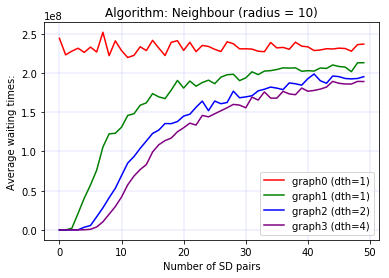

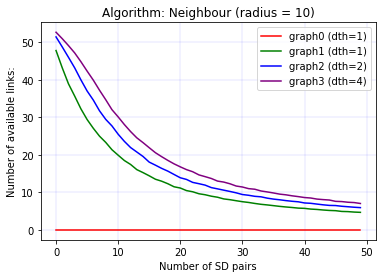

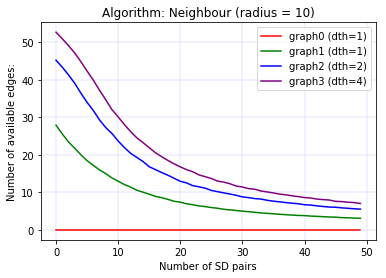

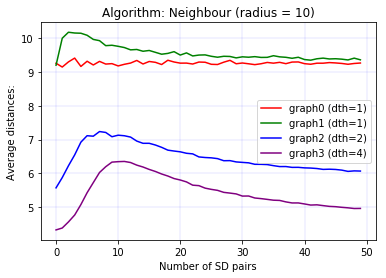

In [20]:
import re
import ast
filename = 'neighbour_10_1000__19_03_07__11_18.log'
log_file_path = '/home/antal/Documents/eit/thesis/dijkstra/quantum_dijkstra/notebooks/logs'
results = parse_from_log(log_file_path, filename)
print(results)
plot_results(results[2], 'neighbour_10_', 'Neighbour (radius = 10)')

In [29]:
colours = ['red', 'green', 'blue', 'yellow', 'grey']
def plot_algorithm_comparison(data: list, titles: list, colours: list, name_of_measure: str, name_of_topology: str):
    for data_index in range(len(data)):
        plt.plot(data[data_index],color=colours[data_index], label=titles[data_index])
    plt.grid(color='b', linestyle='-', linewidth=0.1)

    plt.xlabel('Number of SD pairs')
    plt.ylabel(name_of_measure)
    plt.title(name_of_topology)
    plt.legend()

    timestr = time.strftime("%y_%m_%d__%H_%M")
    
    # Create the plots directory, if it is non-existant yet
    directory = 'plots/comp_alg'
    if not os.path.exists(directory):
        os.makedirs(directory)

    plt.savefig('./'+ directory +'/comp' + name_of_topology + '_' + name_of_measure + str(number_of_samples) + '_' +'_' + timestr +'.png', bbox_inches='tight')
    plt.show()

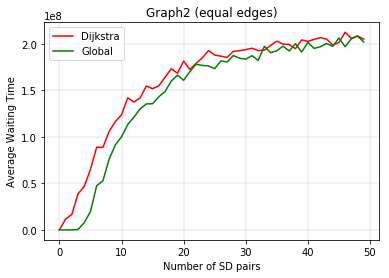

In [30]:
plot_algorithm_comparison(results, ['Dijkstra', 'Global'], colours, 'Average Waiting Time', 'Graph2 (equal edges)')